# Image Enhancement

Image Enhancement memiliki dua keluarga metode utama, yaitu
1. pixel-based methods : piksel individu tidak terpengaruh oleh piksel tetangga
2. spatial-based mathods : piksel tetangga menentukan piksel individu

**Pixel-based method** :
Dioperasikan pada pixel individual dengan nilai intensitas $s = T(r)$ dengan s adalah intensitas baru, T adalah fungsi transformasi, dan r adalah intesitas asal.

Terdiri dari beberapa method :
a. image negatives
b. logaritmic transform
c. contrast stretching
d. gray-level slicing
e. bit-plane slicing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

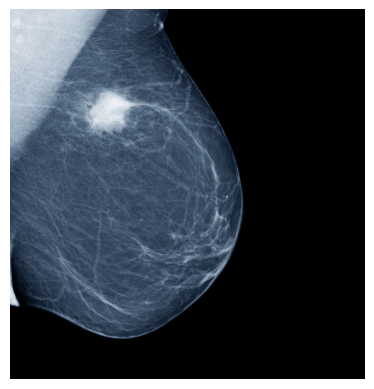

In [12]:
# Read the image from file
image = cv.imread('img/breast-xray.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Image Negatives


- berfungsi baik untuk gambar dengan background gelap --> kita ingin menangkap aspek-aspek non-bg yang penting, biasanya berwarna lebih terang

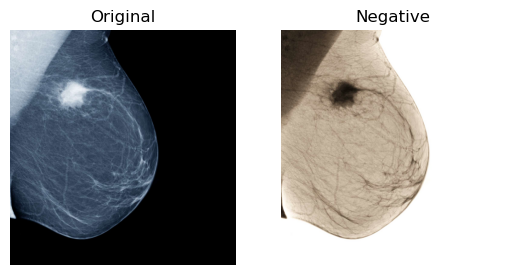

In [14]:
# fungsi untuk mengubah gambar menjadi negatif
def negative(image):
    return 255 - image

# memuat gambar
image = cv.imread('img/breast-xray.jpg')

# mengubah gambar menjadi negatif
negative_image = negative(image)

# menampilkan gambar asli dan negatif
img_toShow = [image, negative_image]
titles = ['Original', 'Negative']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(img_toShow[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

## Logaritmic Transform

$s = T(r) = c.log(1+r)$


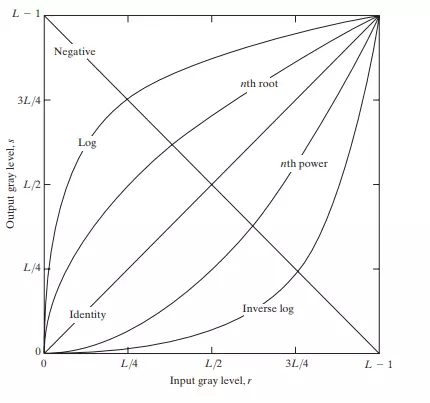

- berusaha menaikkan dengan laju kenaikan yang tinggi pada piksel dengan intensitas rendah dan menaikkan dengan laju rendah pada piksel dengan intensitas tinggi

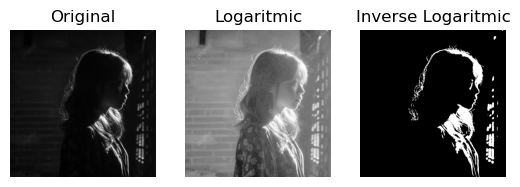

In [18]:
def logaritmic(image):
    c = 255 / np.log(1 + np.max(image))  # Scaling factor
    return c * np.log1p(image)

def inverse_logaritmic(image):
    return np.exp(image / 255) - 1

image = cv.imread('img/girl-low brightness.jpg', cv.IMREAD_GRAYSCALE)

log_image = logaritmic(image)
log_image = np.array(log_image, dtype=np.uint8)

inverse_log_image = inverse_logaritmic(log_image)
inverse_log_image = np.array(inverse_log_image, dtype=np.uint8)

image_toShow = [image, log_image, inverse_log_image]
titles = ['Original', 'Logaritmic', 'Inverse Logaritmic']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(image_toShow[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

Ada beberapa hal menarik yang bisa didapat dari image enhancement di atas, yaitu
1. motif bunga-bunga pada baju wanita tersebut menjadi terlihat
2. motif dinding batu-bata menjadi jelas
3. tampak wajah wanita menjadi lebih jelas 

## Gamma Transform

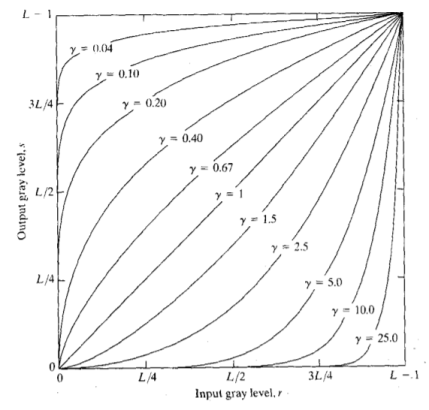

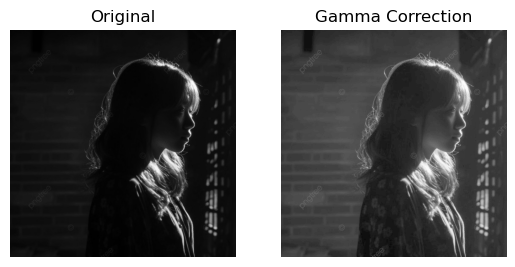

In [19]:
def gamma_correction(image, gamma):
    table = np.array([((i / 255) ** gamma) * 255
        for i in np.arange(0, 256)]).astype('uint8')
    return cv.LUT(image, table)

image = cv.imread('img/girl-low brightness.jpg', cv.IMREAD_GRAYSCALE)
gamma_correction_image = gamma_correction(image, 0.5)

image_toShow = [image, gamma_correction_image]
titles = ['Original', 'Gamma Correction']
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(image_toShow[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

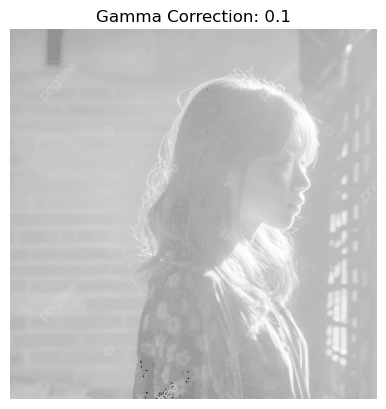

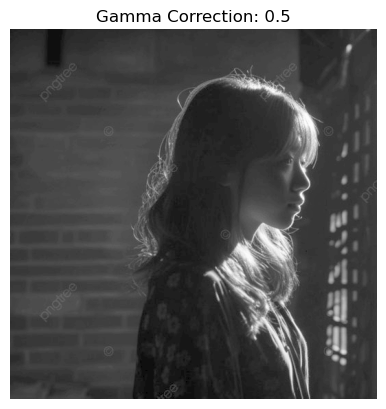

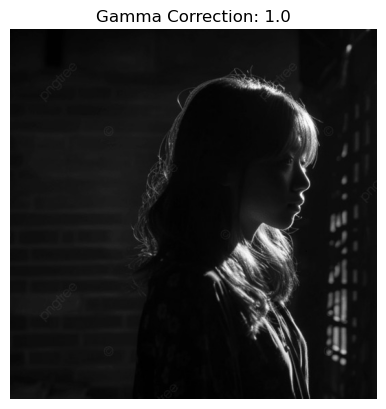

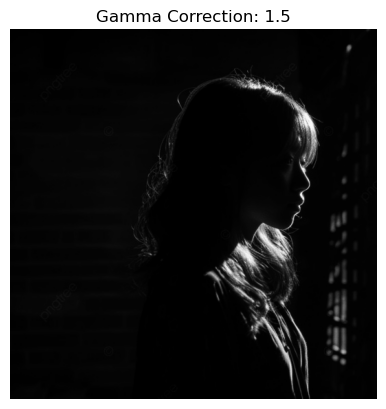

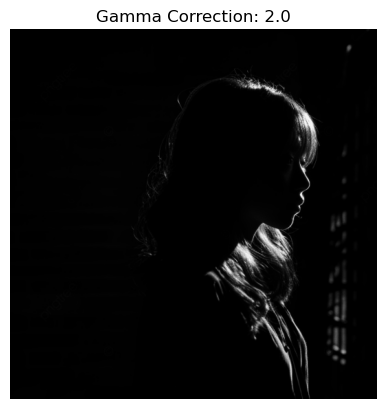

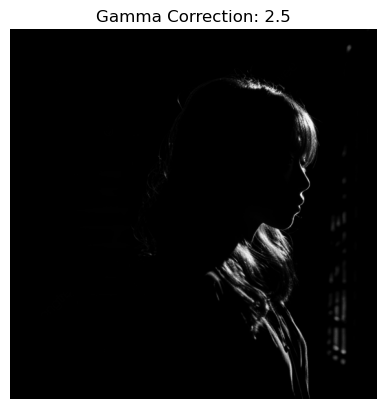

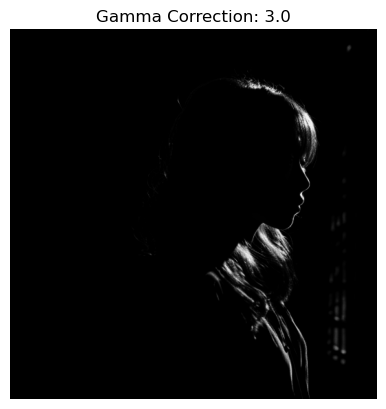

In [20]:
# loop over varius gamma values
for gamma in np.arange(0.0, 3.5, 0.5):
    gamma = gamma if gamma > 0 else 0.1
    gamma_corrected = gamma_correction(image, gamma)
    plt.figure()
    plt.imshow(gamma_corrected, cmap='gray')
    plt.axis('off')
    plt.title('Gamma Correction: {}'.format(gamma))